In [23]:
import pandas as pd 
titanic_original = pd.read_csv("data/titanic/train.csv", sep=',')
titanic_train = pd.read_csv("data/titanic/train.csv", sep=',')
titanic_test = pd.read_csv("data/titanic/test.csv", sep=',')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
print("Taille du dataset d'entrainement : ",titanic_train.shape)
print("Taille du dataset de test : ",titanic_test.shape)

Taille du dataset d'entrainement :  (891, 12)
Taille du dataset de test :  (418, 11)


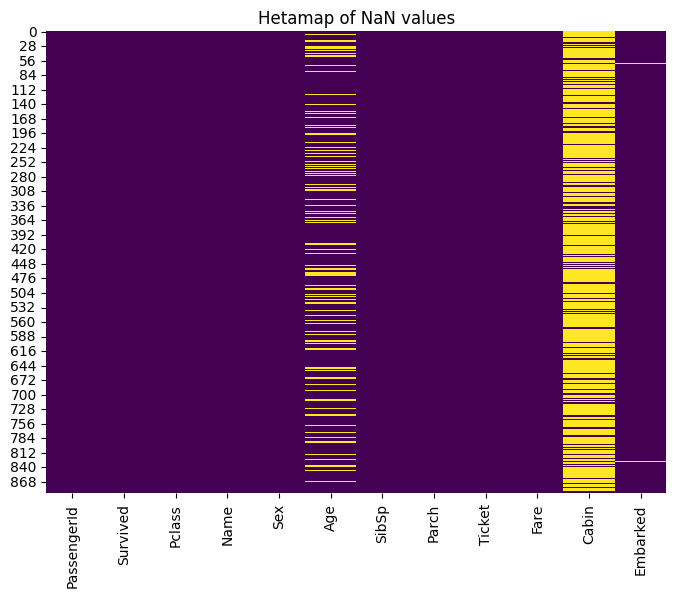

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(titanic_train.isnull(), cbar=False, cmap='viridis')
plt.title('Hetamap of NaN values')

plt.savefig("img/heatmap.png")
plt.show()

In [26]:
percentage_nan = titanic_train['Age'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'age' est de {percentage_nan:.2f}%")

Le pourcentage de valeurs NaN dans la colonne 'age' est de 19.87%


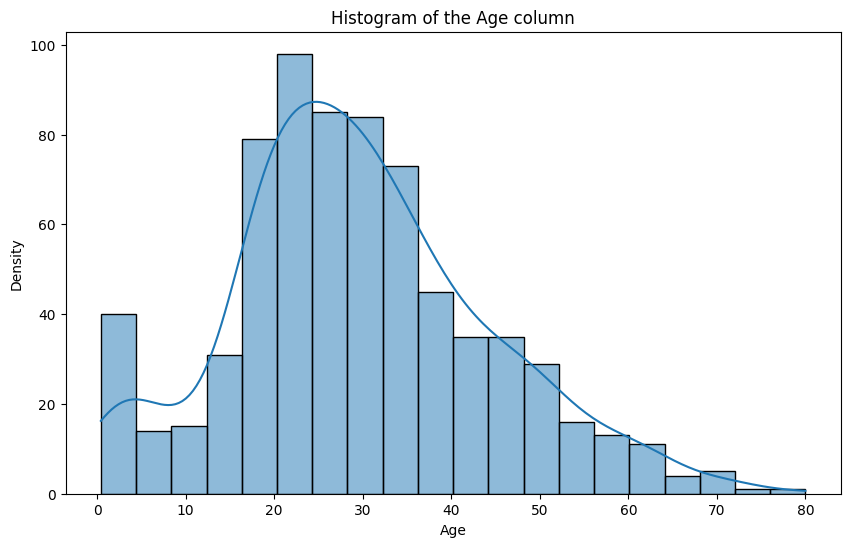

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_train, x='Age', kde=True)
plt.title('Histogram of the Age column')
plt.xlabel('Age')
plt.ylabel('Density')

plt.savefig('img/age_histogram.png')
plt.show()

In [28]:
print(f"La médiane de la colonne Age est : {titanic_train['Age'].mean():.1f}")
print(f"La moyenne de la colonne Age est : {titanic_train['Age'].median():.1f}")

percentage_nan_cabin = titanic_train['Cabin'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de {percentage_nan_cabin:.2f}%")

La médiane de la colonne Age est : 29.7
La moyenne de la colonne Age est : 28.0
Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de 77.10%


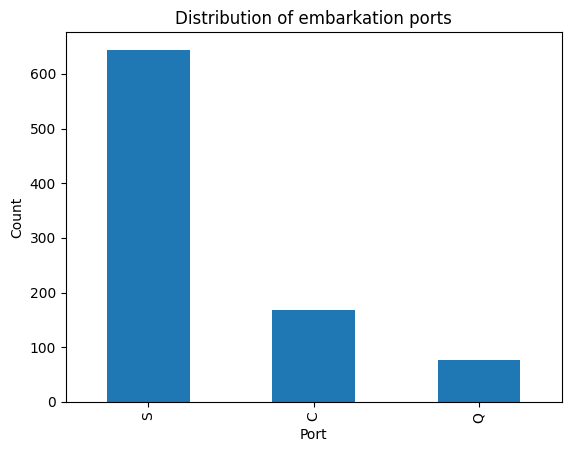

In [29]:
titanic_train['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribution of embarkation ports')
plt.xlabel('Port')
plt.ylabel('Count')
plt.savefig("img/PortEmbarkations.png")
plt.show()

In [30]:
titanic_train['Age'].fillna(28, inplace=True)
titanic_train['Embarked'].fillna('S', inplace=True)
titanic_train.drop(columns=['Cabin'], inplace=True)
missing_values = titanic_train.isnull().sum()
print("Valeurs manquantes après prétraitement :")
print(missing_values)

print("\nAperçu du DataFrame après prétraitement :")
print(titanic_train.head())

print("\nDistribution de 'Embarked' :")
print(titanic_train['Embarked'].value_counts())

print("\nStatistiques de 'Age' :")
print(titanic_train['Age'].describe())

Valeurs manquantes après prétraitement :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Aperçu du DataFrame après prétraitement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare 

C:\Users\randy\AppData\Local\Temp\ipykernel_23392\3850635755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(28, inplace=True)
C:\Users\randy\AppData\Local\Temp\ipykernel_23392\3850635755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

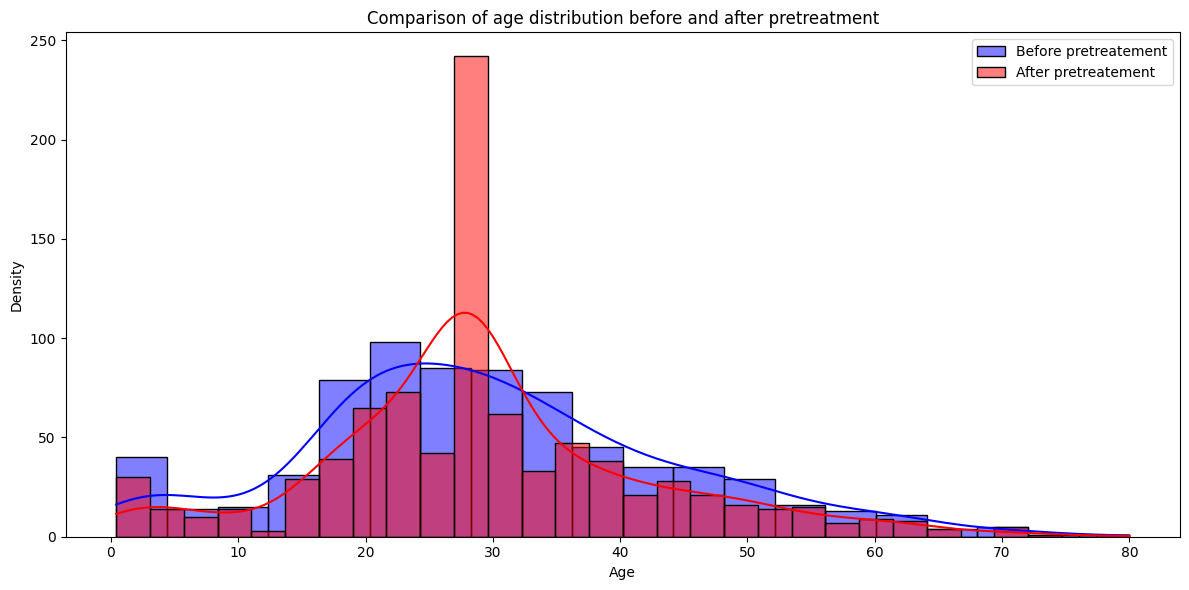

In [31]:
plt.figure(figsize=(12, 6))

sns.histplot(data=titanic_original, x='Age', kde=True, color='blue', alpha=0.5, label='Before pretreatement')
sns.histplot(data=titanic_train, x='Age', kde=True, color='red', alpha=0.5, label='After pretreatement')

plt.title('Comparison of age distribution before and after pretreatment')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("img/BeforeAfterCombine.png")
plt.show()

In [32]:
titanic_train['TravelAlone'] = ((titanic_train['SibSp'] == 0) & (titanic_train['Parch'] == 0)).astype(int)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [33]:
encoded = pd.get_dummies(titanic_train, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
encoded.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,TravelAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,False,True,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,False,True,True,False,True


In [43]:
encoded_cleaned = encoded.drop(columns=['PassengerId', 'Name', 'Ticket'])
encoded_cleaned.head()

,Survived,Age,SibSp,Parch,Fare,TravelAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,False,True,True,False,True
1,1,38.0,1,0,71.2833,0,False,False,False,False,False
2,1,26.0,0,0,7.9250,1,False,True,False,False,True
3,1,35.0,1,0,53.1000,0,False,False,False,False,True
4,0,35.0,0,0,8.0500,1,False,True,True,False,True


In [35]:
# Remplir les valeurs manquantes dans la colonne 'Age'
if 'Age' in titanic_train.columns:
    titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

# Remplir les valeurs manquantes dans la colonne 'Fare'
if 'Fare' in titanic_train.columns:
    if 'Pclass' in titanic_train.columns:
        titanic_train['Fare'].fillna(titanic_train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
    else:
        titanic_train['Fare'].fillna(titanic_train['Fare'].median(), inplace=True)

# Créer une nouvelle colonne 'Cabin_known'
if 'Cabin' in titanic_train.columns:
    titanic_train['Cabin_known'] = titanic_train['Cabin'].notna().astype(int)

# Afficher les valeurs manquantes
print(titanic_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64


C:\Users\randy\AppData\Local\Temp\ipykernel_23392\1595056820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
C:\Users\randy\AppData\Local\Temp\ipykernel_23392\1595056820.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [44]:
titanic_train['IsMinor'] = (titanic_train['Age'] < 16).astype(int)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone,IsMinor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


C:\Users\randy\AppData\Local\Temp\ipykernel_23392\3375313225.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(28, inplace=True)


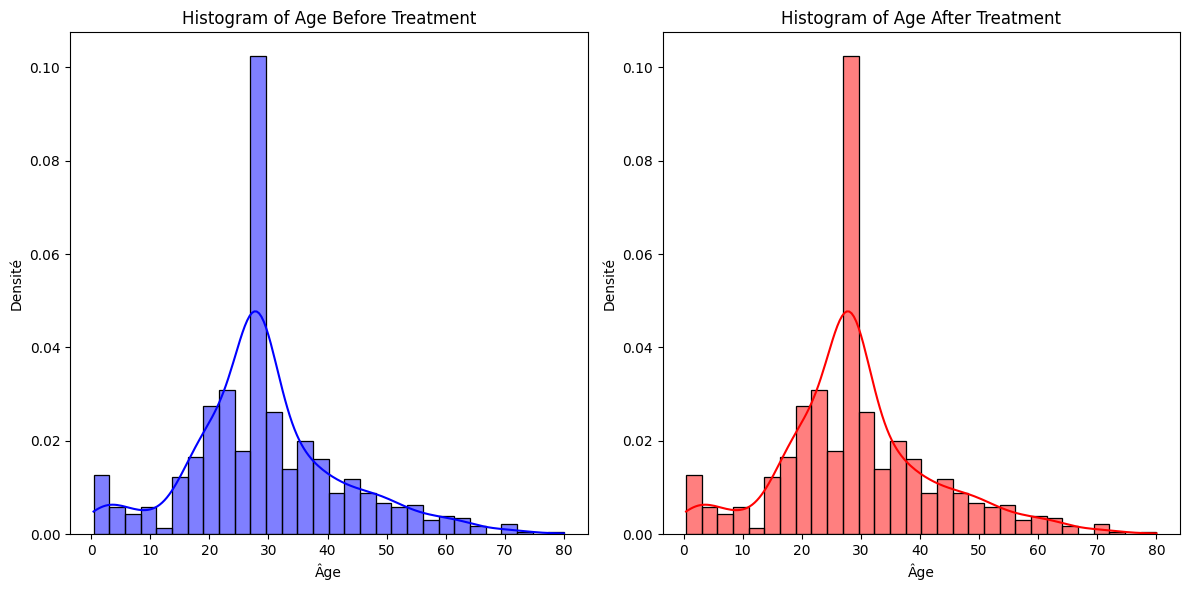

In [48]:
original_age = titanic_train['Age'].copy()

titanic_train['Age'].fillna(28, inplace=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(original_age, kde=True, color='blue', stat='density', bins=30)
plt.title('Histogram of Age Before Treatment')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.savefig("img/BeforeTreatment.png")

plt.subplot(1, 2, 2)
sns.histplot(titanic_train['Age'], kde=True, color='red', stat='density', bins=30)
plt.title('Histogram of Age After Treatment')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.savefig("img/AfterTreatment.png")

plt.tight_layout()
plt.show()

C:\Users\randy\AppData\Local\Temp\ipykernel_23392\4067971179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_class, x='Pclass', y='Survived', palette='viridis')


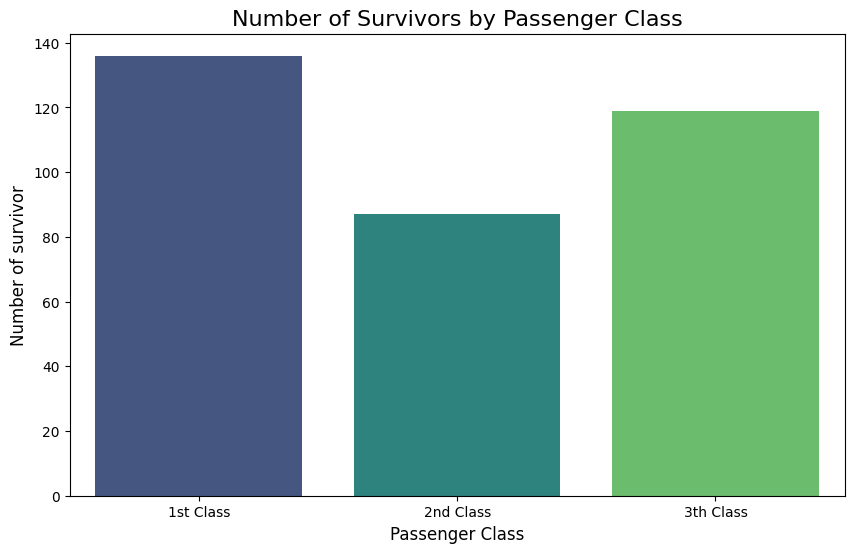

In [ ]:
survivors_by_class = titanic_train.groupby('Pclass')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=survivors_by_class, x='Pclass', y='Survived', palette='viridis')

plt.title('Number of Survivors by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of survivor', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3th Class'])

plt.show()

C:\Users\randy\AppData\Local\Temp\ipykernel_23392\3260628245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_embarked, x='Embarked', y='Survived', palette='viridis')


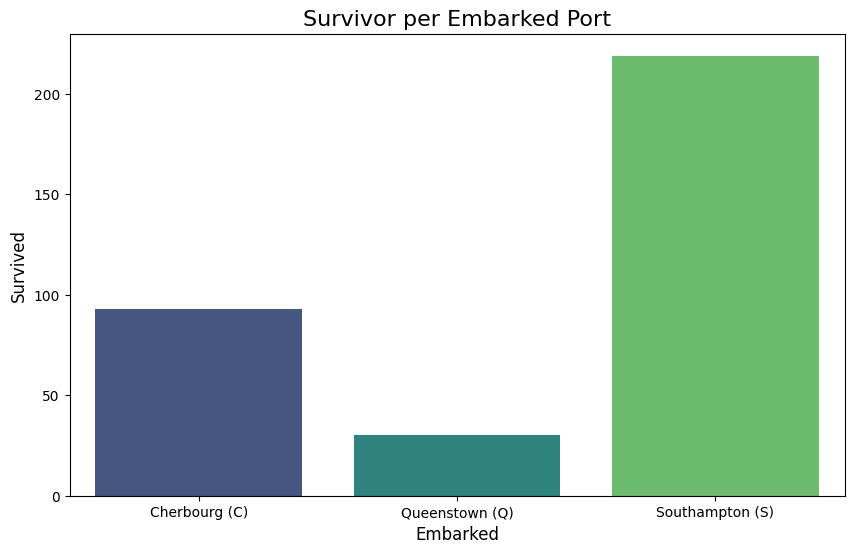

In [50]:
plt.figure(figsize=(10, 6))
survivors_by_embarked = titanic_train.groupby('Embarked')['Survived'].sum().reset_index()
sns.barplot(data=survivors_by_embarked, x='Embarked', y='Survived', palette='viridis')

plt.title('Survivor per Embarked Port', fontsize=16)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Survived', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])

plt.savefig("img/SurvivorPerEmbarkedPort.png")
plt.show()

C:\Users\randy\AppData\Local\Temp\ipykernel_23392\4125146931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_travel_alone, x='TravelAlone', y='Survived', palette='viridis')


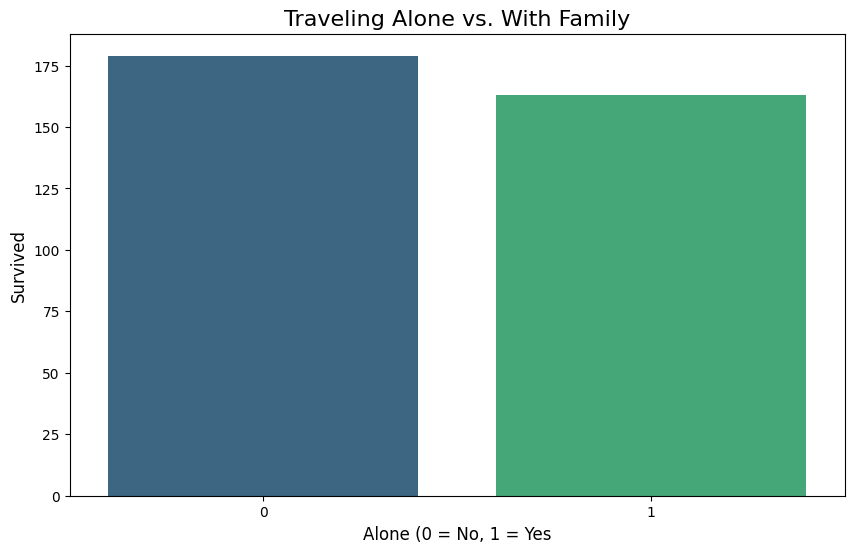

In [51]:
survivors_by_travel_alone = titanic_train.groupby('TravelAlone')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=survivors_by_travel_alone, x='TravelAlone', y='Survived', palette='viridis')

plt.title('Traveling Alone vs. With Family', fontsize=16)
plt.xlabel('Alone (0 = No, 1 = Yes', fontsize=12)
plt.ylabel('Survived', fontsize=12)

plt.savefig("img/TravelingAlonevsWithFamily.png")
plt.show()

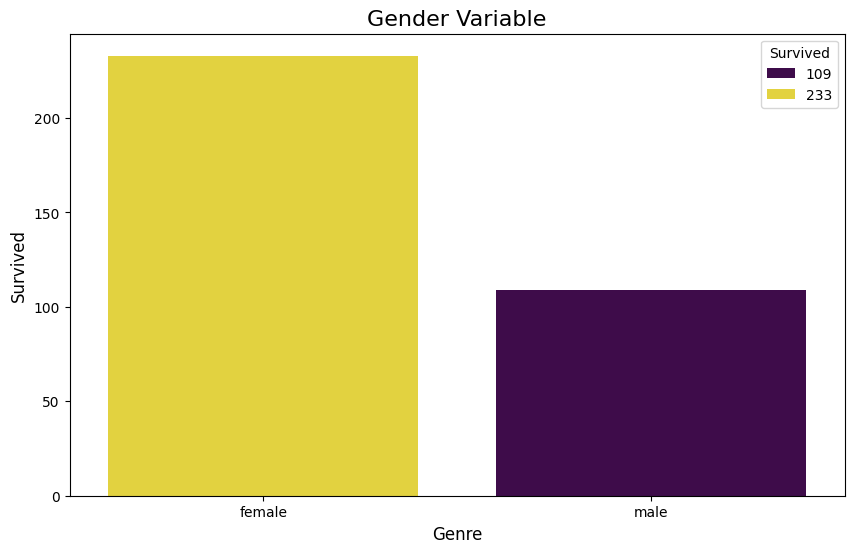

In [56]:
survivors_by_gender = titanic_train.groupby('Sex')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=survivors_by_gender, x='Sex', y='Survived', hue = 'Survived', palette='viridis')

plt.title('Gender Variable', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Survived', fontsize=12)

plt.savefig("img/GenderVariable.png")
plt.show()

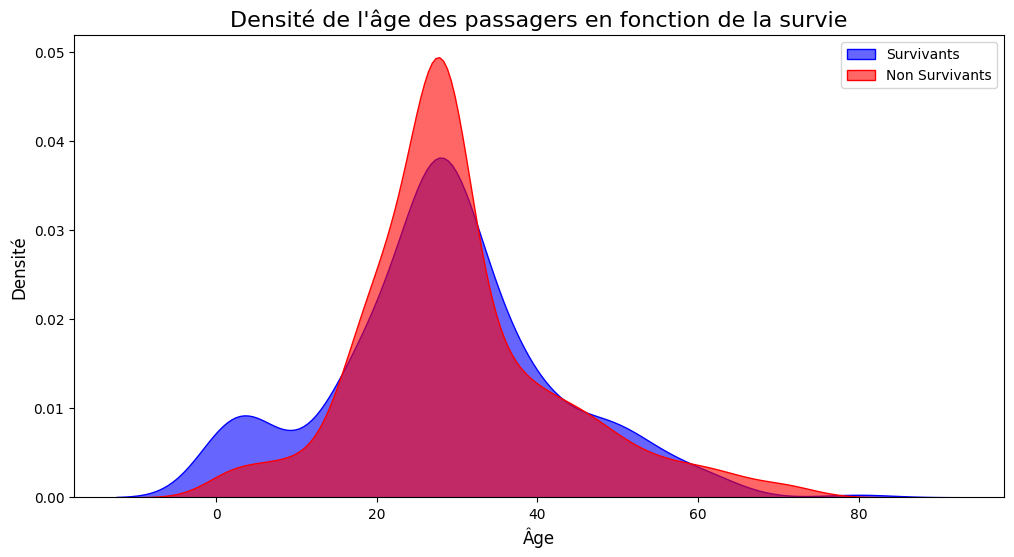

In [ ]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=titanic_train[titanic_train['Survived'] == 1], x="Age", fill=True, label="Survivor", color="blue", alpha=0.6)

# Distribution d'âge pour les passagers qui n'ont pas survécu
sns.kdeplot(data=titanic_train[titanic_train['Survived'] == 0], x="Age", fill=True, label="No urvivor", color="red", alpha=0.6)

# Ajouter des titres et des légendes
plt.title("Passenger age density as a function of survival", fontsize=16)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.legend()

# Afficher le graphique
plt.show()